In [1]:
#log_m1_1.csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Upload CSV file from local system
from google.colab import files
uploaded = files.upload()

# Read the uploaded CSV file (replace 'your_file.csv' with actual file name)
file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)
df.columns = df.columns.str.strip()  # Clean column names
df["model"] = df["model"].str.replace('_', '')
df.head()






Saving log_m1_1.csv to log_m1_1.csv


,Unix_time,count,model,speed,loading_time
0,1739660256,1,deep40,1,0.215727
1,1739660261,2,shallow40,2,0.066762
2,1739660281,3,shallow20,4,0.053751
3,1739660291,4,deep40,1,0.198721
4,1739660311,5,shallow40,2,0.052322


In [ ]:
# Analyze speed 1, 2, 3, 4 frequency
speed_analysis = df["speed"].value_counts().sort_index()
print("\nSpeed 1-4 Frequency Analysis:")
print(speed_analysis)


Speed 1-4 Frequency Analysis:
speed
1    31
2    32
3    31
4    35
Name: count, dtype: int64


In [ ]:
df.describe()

,Unix_time,count,speed,loading_time
count,1.290000e+02,129.000000,129.000000,129.000000
mean,1.739661e+09,65.000000,2.542636,0.114185
std,5.373346e+02,37.383151,1.131977,0.066755
min,1.739660e+09,1.000000,1.000000,0.035928
25%,1.739661e+09,33.000000,2.000000,0.053812
50%,1.739661e+09,65.000000,3.000000,0.085086
75%,1.739662e+09,97.000000,4.000000,0.164457
max,1.739662e+09,129.000000,4.000000,0.358801


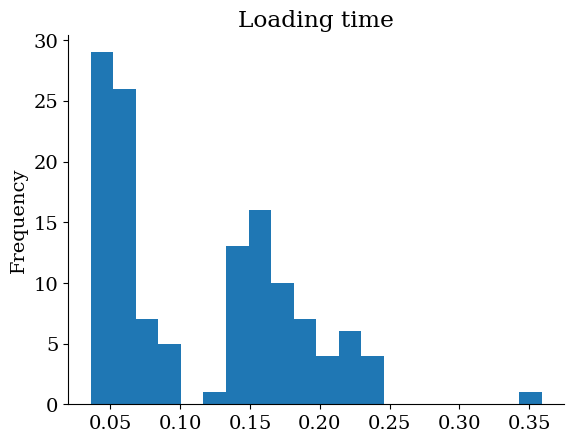

In [ ]:
# @title loading_time

from matplotlib import pyplot as plt # Set plot style and font
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14
})

df['loading_time'].plot(kind='hist', bins=20, title='Loading time')
plt.gca().spines[['top', 'right',]].set_visible(False)

Model-wise Loading Time Summary:
           count      mean       std       min       25%       50%       75%  \
model                                                                          
deep20      31.0  0.177645  0.045882  0.141578  0.149551  0.162898  0.182861   
deep40      31.0  0.175967  0.029382  0.125626  0.153217  0.170903  0.193845   
shallow20   35.0  0.055721  0.013526  0.037914  0.044427  0.053812  0.061570   
shallow40   32.0  0.056802  0.014972  0.035928  0.043499  0.054341  0.065508   

                max  
model                
deep20     0.358801  
deep40     0.240196  
shallow20  0.086746  
shallow40  0.090692  


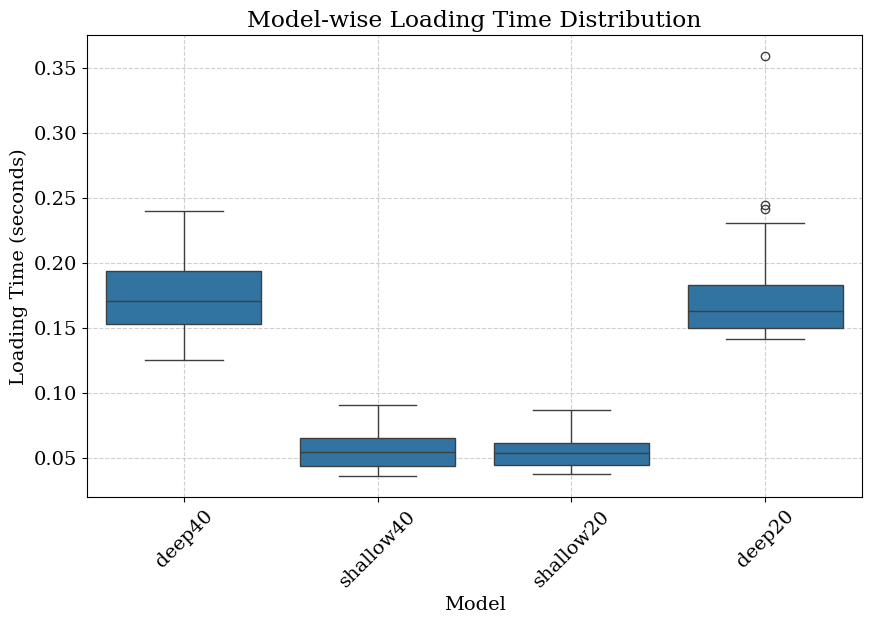

In [ ]:

# Table: Model-wise Loading Time Summary
model_summary = df.groupby("model")["loading_time"].describe()
print("Model-wise Loading Time Summary:")
print(model_summary)

# Box Plot: Model-wise Loading Time
plt.figure(figsize=(10, 6))
sns.boxplot(x="model", y="loading_time", data=df)
plt.xticks(rotation=45)
plt.title("Model-wise Loading Time Distribution")
plt.xlabel("Model")
plt.ylabel("Loading Time (seconds)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("model_loading_time.png", dpi=300, bbox_inches="tight")
plt.show()



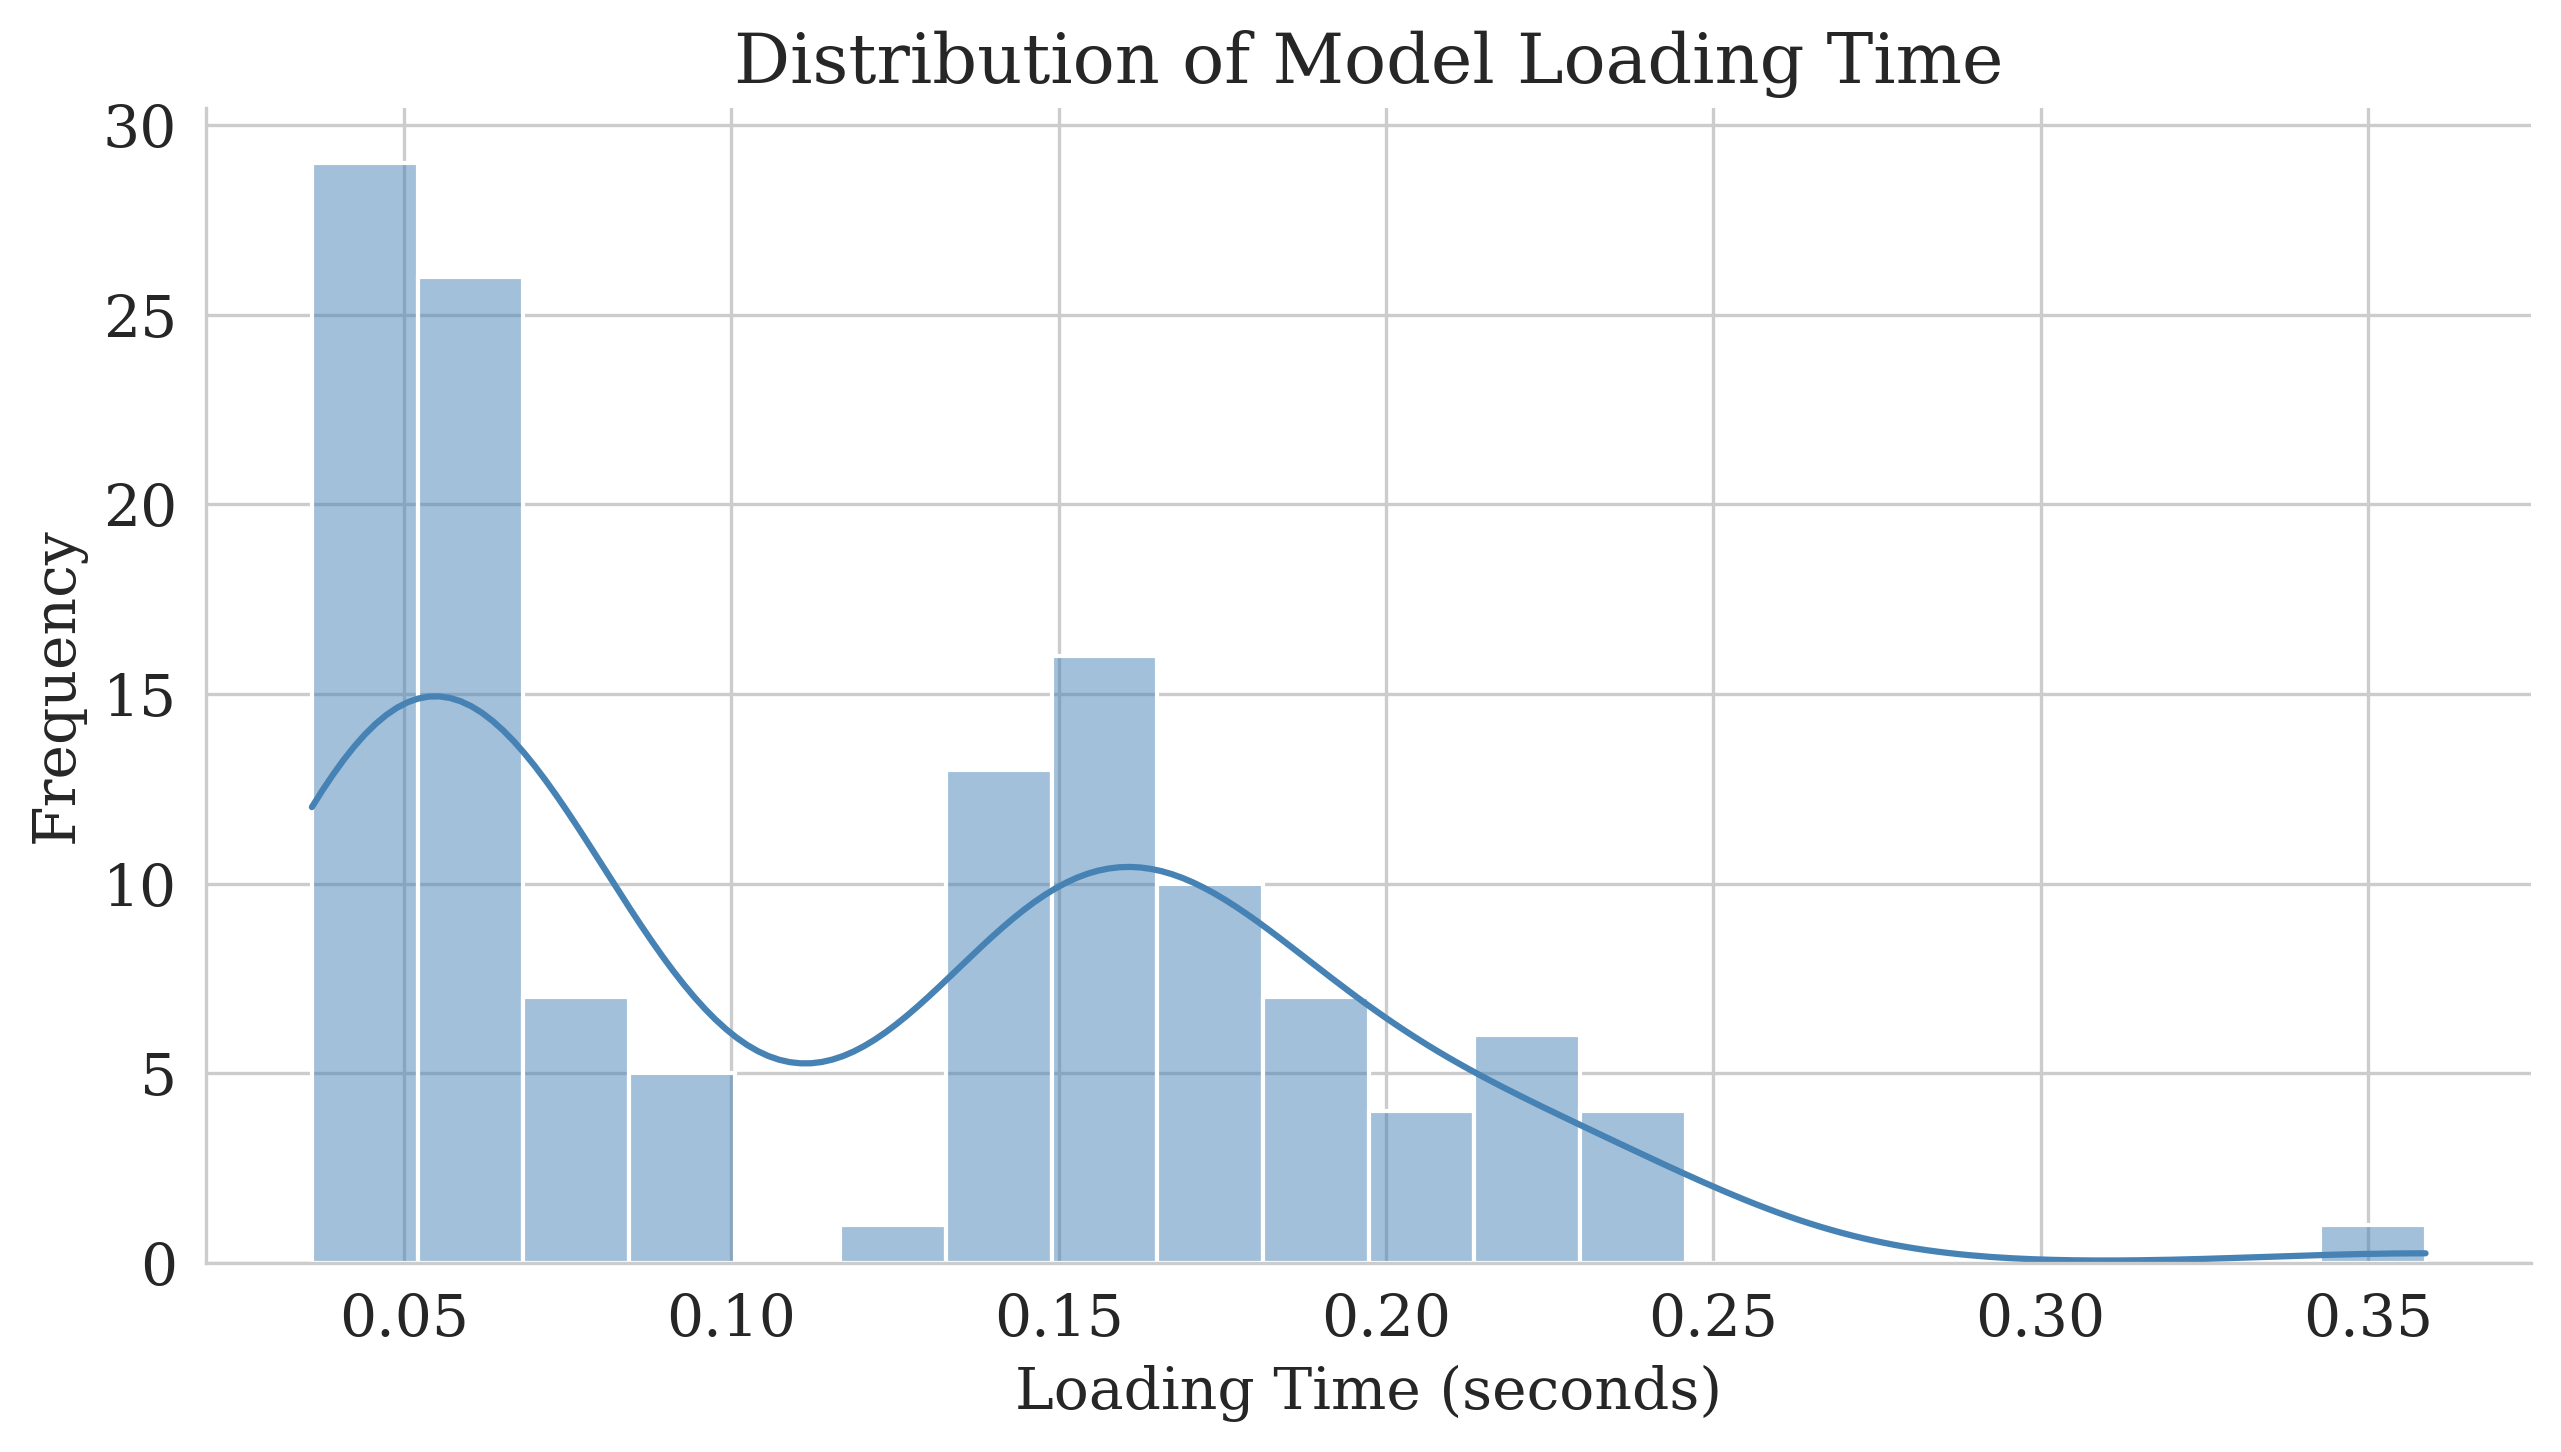

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set plot style and font
plt.rcParams.update({
    "font.family": "serif",
    "font.size": 14
})

# Create histogram with a darker blue color
plt.figure(figsize=(10, 5), dpi=300)  # High-resolution plot
sns.histplot(df["loading_time"], bins=20, kde=True, color="steelblue")  # Darker color

# Customize plot
plt.xlabel("Loading Time (seconds)")
plt.ylabel("Frequency")
plt.title("Distribution of Model Loading Time")

# Remove top and right spines for a clean look
sns.despine()

# Show plot
plt.show()



Model-wise Loading Time by Speed Summary:
                 count      mean       std       min       25%       50%  \
model     speed                                                            
deep20    3       31.0  0.177645  0.045882  0.141578  0.149551  0.162898   
deep40    1       31.0  0.175967  0.029382  0.125626  0.153217  0.170903   
shallow20 4       35.0  0.055721  0.013526  0.037914  0.044427  0.053812   
shallow40 2       32.0  0.056802  0.014972  0.035928  0.043499  0.054341   

                      75%       max  
model     speed                      
deep20    3      0.182861  0.358801  
deep40    1      0.193845  0.240196  
shallow20 4      0.061570  0.086746  
shallow40 2      0.065508  0.090692  


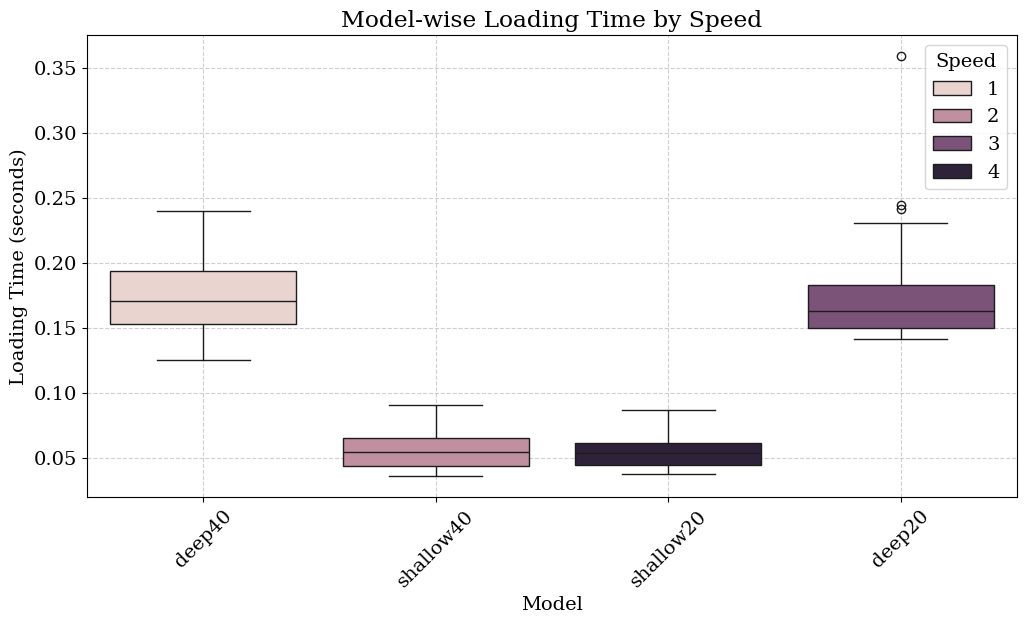

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
# Table: Model-wise Loading Time by Speed
model_speed_summary = df.groupby(["model", "speed"]) ["loading_time"].describe()
print("\nModel-wise Loading Time by Speed Summary:")
print(model_speed_summary)

# Box Plot: Model-wise Loading Time by Speed
plt.figure(figsize=(12, 6))
sns.boxplot(x="model", y="loading_time", hue="speed", data=df)
plt.xticks(rotation=45)
plt.title("Model-wise Loading Time by Speed")
plt.xlabel("Model")
plt.ylabel("Loading Time (seconds)")
plt.legend(title="Speed")
plt.grid(True, linestyle="--", alpha=0.6)
plt.savefig("model_speed_loading_time.png", dpi=300, bbox_inches="tight")
plt.show()

# Download the generated plots
from google.colab import files
files.download("model_loading_time.png")
files.download("model_speed_loading_time.png")